In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv


In [2]:
train = pd.read_csv("../input/home-data-for-ml-course/train.csv")
test = pd.read_csv("../input/home-data-for-ml-course/test.csv")
#../input/home-data-for-ml-course/train.csv

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
train.shape

(1460, 81)

In [8]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
alldata = pd.concat([train,test])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
alldata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [11]:
alldata.shape

(2919, 81)

In [12]:
alldata.loc[alldata.PoolQC.isnull() == False]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
197,1360,1360,0,NaN,4,1Fam,TA,No,1036.0,184.0,GLQ,LwQ,1.0,1.0,TA,140.0,Y,Artery,Norm,SBrkr,552,Gd,Gd,Stucco,Stucco,GdPrv,Ex,1,PConc,2,Typ,795.0,2.0,TA,Unf,TA,Detchd,1918.0,3112,0,GasA,Gd,2Story,198,1,Gd,Lvl,Gtl,25419,Corner,174.0,Reg,392,75,RL,0.0,None,NaN,0,3,NAmes,16,4,8,Y,512,Ex,CompShg,Gable,Abnorml,235000.0,WD,0,Pave,8,1360.0,AllPub,0,1918,1990,2006
810,1309,0,0,NaN,3,1Fam,TA,No,663.0,377.0,ALQ,LwQ,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,GdPrv,Fa,1,CBlock,1,Typ,484.0,2.0,TA,RFn,TA,Attchd,1974.0,1309,1,GasA,Fa,1Story,811,1,Gd,Lvl,Gtl,10140,Inside,78.0,Reg,0,20,RL,99.0,BrkFace,NaN,0,1,NWAmes,0,6,6,Y,648,Fa,CompShg,Hip,Normal,181000.0,WD,0,Pave,5,1040.0,AllPub,265,1974,1999,2006
1170,1118,0,0,NaN,3,1Fam,TA,Av,522.0,0.0,ALQ,Unf,1.0,0.0,TA,574.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,GdPrv,Po,1,CBlock,1,Typ,358.0,1.0,TA,Fin,TA,Attchd,1977.0,1118,0,GasA,TA,SLvl,1171,1,TA,Lvl,Gtl,9880,Inside,76.0,Reg,0,80,RL,0.0,None,NaN,0,7,Mitchel,0,6,6,Y,576,Gd,CompShg,Gable,Normal,171000.0,WD,0,Pave,6,1096.0,AllPub,203,1977,1977,2008
1182,2411,2065,0,NaN,4,1Fam,TA,Av,2096.0,0.0,GLQ,Unf,1.0,0.0,Ex,300.0,Y,Norm,Norm,SBrkr,0,TA,Gd,Wd Sdng,ImStucc,MnPrv,TA,2,PConc,3,Typ,813.0,3.0,TA,Fin,TA,Attchd,1996.0,4476,1,GasA,Ex,2Story,1183,1,Ex,Lvl,Gtl,15623,Corner,160.0,IR1,0,60,RL,0.0,None,NaN,0,7,NoRidge,78,5,10,Y,555,Ex,CompShg,Hip,Abnorml,745000.0,WD,0,Pave,10,2396.0,AllPub,171,1996,1996,2007
1298,4692,950,0,NaN,3,1Fam,TA,Gd,5644.0,0.0,GLQ,Unf,2.0,0.0,Ex,466.0,Y,Feedr,Norm,SBrkr,0,TA,Ex,Stucco,Stucco,NaN,Gd,3,PConc,2,Typ,1418.0,2.0,TA,Fin,TA,Attchd,2008.0,5642,1,GasA,Ex,2Story,1299,1,Ex,Bnk,Gtl,63887,Corner,313.0,IR3,0,60,RL,796.0,Stone,NaN,0,1,Edwards,292,5,10,Y,480,Gd,ClyTile,Hip,Partial,160000.0,New,0,Pave,12,6110.0,AllPub,214,2008,2008,2008
1386,1392,1392,0,NaN,5,1Fam,TA,No,790.0,469.0,BLQ,LwQ,1.0,0.0,Gd,133.0,Y,RRAn,Norm,SBrkr,0,TA,TA,Plywood,Plywood,MnPrv,TA,2,CBlock,3,Typ,564.0,2.0,TA,RFn,TA,Attchd,1978.0,2784,1,GasA,TA,2Story,1387,1,Gd,Lvl,Gtl,16692,Inside,80.0,IR1,0,60,RL,184.0,BrkFace,TenC,2000,7,NWAmes,112,5,7,Y,519,Fa,CompShg,Gable,Normal,250000.0,WD,440,Pave,12,1392.0,AllPub,0,1978,1978,2006
1423,1575,626,0,NaN,4,1Fam,TA,Av,0.0,0.0,Unf,Unf,0.0,0.0,Gd,697.0,Y,Norm,Norm,SBrkr,0,Gd,Gd,Plywood,Plywood,GdPrv,Gd,1,CBlock,2,Typ,432.0,2.0,Gd,Unf,Gd,Attchd,1966.0,2201,0,GasA,TA,SLvl,1424,1,Gd,Lvl,Gtl,19690,CulDSac,NaN,IR1,0,80,RL,0.0,None,NaN,0,8,Edwards,236,7,6,Y,738,Gd,Tar&Grv,Flat,Alloca,274970.0,WD,0,Pave,8,697.0,AllPub,586,1966,1966,2006
514,2470,0,0,NaN,1,1Fam,TA,Gd,2257.0,0.0,GLQ,Unf,2.0,0.0,Ex,278.0,Y,Norm,Norm,SBrkr,0,TA,Ex,MetalSd,MetalSd,NaN,Gd,2,PConc,1,Typ,789.0,3.0,TA,Fin,TA,Attchd,2003.0,2470,1,GasA,Ex,1Story,1975,1,Ex,HLS,Mod,12720,Inside,106.0,Reg,0,20,RL,680.0,Stone,NaN,0,2,NridgHt,65,5,10,Y,144,Ex,CompShg,Hip,Normal,NaN,WD,216,Pave,7,2535.0,AllPub,154,2003,2003,2008
1113,2726,0,0,NaN,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,279.0,Y,Norm,Norm,SBrkr,169,TA,Gd,WdShing,Plywood,NaN,Gd,1,CBlock,2,Typ,691.0,2.0,Gd,Fin,Gd,Attchd,1986.0,2726,1,GasA,Gd,1Story,2574,1,Gd,HLS,Gtl,18044,CulDSac,70.0,IR1,0,20,RL,0.0,None,NaN,0,8,Crawfor,64,5,8,Y,228,Ex,CompShg,Gable,Normal,NaN,WD,0,Pa

In [13]:
alldata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500.0,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500.0,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500.0,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000.0,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000.0,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [14]:
alldata.loc[alldata.PoolArea !=0,["OverallQual","PoolQC"]]

,OverallQual,PoolQC
197,8,Ex
810,6,Fa
1170,6,Gd
1182,10,Ex
1298,10,Gd
1386,7,Fa
1423,6,Gd
514,10,Ex
960,4,NaN
1043,6,NaN


In [15]:
alldata = alldata.reset_index(drop=True)

In [16]:
alldata.loc[alldata.PoolArea !=0,["OverallQual","PoolQC"]]

,OverallQual,PoolQC
197,8,Ex
810,6,Fa
1170,6,Gd
1182,10,Ex
1298,10,Gd
1386,7,Fa
1423,6,Gd
1974,10,Ex
2420,4,NaN
2503,6,NaN


In [17]:
alldata.loc[2420,"PoolQC"] = "Fa"
alldata.loc[2503,"PoolQC"] = "Gd"
alldata.loc[2599,"PoolQC"] = "Fa"

In [18]:
alldata.PoolQC = alldata.PoolQC.fillna("None")

In [19]:
alldata.isnull().sum().sort_values(ascending=False)

MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
Functional          2
BsmtHalfBath        2
Utilities           2
BsmtFinSF1          1
GarageCars          1
Electrical          1
TotalBsmtSF         1
SaleType            1
GarageArea          1
BsmtUnfSF           1
Exterior1st         1
Exterior2nd         1
KitchenQual         1
BsmtFinSF2          1
3SsnPorch           0
2ndFlrSF            0
Foundation          0
FullBath            0
ExterQual           0
Fireplaces          0
BedroomAbvGr        0
BldgType            0
ExterCond           0
EnclosedPorch       0
Condition2          0
Condition1

In [20]:
#MiscFeature      2814
#Alley            2721
#Fence            2348
#SalePrice        1459
#FireplaceQu      1420
alldata[["MiscFeature","Alley","Fence","FireplaceQu"]] = alldata[["MiscFeature","Alley","Fence","FireplaceQu"]].fillna("None")

In [21]:
alldata.isnull().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageYrBlt       159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtHalfBath        2
Functional          2
BsmtFullBath        2
Utilities           2
KitchenQual         1
BsmtFinSF2          1
BsmtUnfSF           1
BsmtFinSF1          1
SaleType            1
GarageArea          1
GarageCars          1
TotalBsmtSF         1
Electrical          1
Exterior1st         1
Exterior2nd         1
FullBath            0
Foundation          0
Fireplaces          0
FireplaceQu         0
YrSold              0
Fence               0
ExterQual           0
ExterCond           0
EnclosedPorch       0
Condition1          0
CentralAir          0
BldgType            0
BedroomAbvGr        0
Alley               0
3SsnPorch           0
2ndFlrSF  

In [22]:
#LotFrontage       486
#GarageFinish      159
#GarageQual        159
#GarageYrBlt       159
#GarageCond        159
#GarageType        157
alldata.loc[alldata.GarageFinish.isnull() == True,["GarageFinish","GarageQual","GarageYrBlt","GarageCond","GarageType"]]

,GarageFinish,GarageQual,GarageYrBlt,GarageCond,GarageType
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN


In [23]:
alldata.loc[alldata.GarageType=="Detchd",["GarageFinish","GarageQual","GarageYrBlt","GarageCond","GarageType"]]
#Detchd

,GarageFinish,GarageQual,GarageYrBlt,GarageCond,GarageType
3,Unf,TA,1998.0,TA,Detchd
8,Unf,Fa,1931.0,TA,Detchd
10,Unf,TA,1965.0,TA,Detchd
12,Unf,TA,1962.0,TA,Detchd
15,Unf,TA,1991.0,TA,Detchd
18,Unf,TA,2004.0,TA,Detchd
26,Unf,TA,2005.0,TA,Detchd
29,Unf,Fa,1920.0,TA,Detchd
30,Unf,TA,1920.0,Fa,Detchd
38,Unf,TA,1953.0,TA,Detchd


In [24]:
alldata.loc[[2126,2576],"GarageFinish"] = alldata.loc[alldata.GarageType=="Detchd"].GarageFinish.mode()[0]
alldata.loc[[2126,2576],"GarageQual"] = alldata.loc[alldata.GarageType=="Detchd"].GarageQual.mode()[0]
alldata.loc[[2126,2576],"GarageYrBlt"] = alldata.loc[alldata.GarageType=="Detchd"].GarageYrBlt.mean()
alldata.loc[[2126,2576],"GarageCond"] = alldata.loc[alldata.GarageType=="Detchd"].GarageCond.mode()[0]

In [25]:
alldata[["GarageFinish","GarageQual","GarageCond","GarageType"]] = alldata[["GarageFinish","GarageQual","GarageCond","GarageType"]].fillna("None")

In [26]:
alldata["GarageYrBlt"] = alldata["GarageYrBlt"].fillna(0)

In [27]:
alldata.isnull().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
BsmtFullBath        2
Functional          2
Utilities           2
BsmtHalfBath        2
Electrical          1
BsmtUnfSF           1
KitchenQual         1
Exterior2nd         1
Exterior1st         1
BsmtFinSF2          1
BsmtFinSF1          1
SaleType            1
GarageArea          1
TotalBsmtSF         1
GarageCars          1
Foundation          0
Fireplaces          0
FireplaceQu         0
FullBath            0
Fence               0
GarageCond          0
YrSold              0
Condition1          0
ExterQual           0
ExterCond           0
EnclosedPorch       0
Condition2          0
GarageQual          0
CentralAir          0
BldgType            0
BedroomAbvGr        0
Alley               0
3SsnPorch           0
2ndFlrSF            0
GarageFinish        0
Heating   

In [28]:
alldata.loc[alldata.LotFrontage.isnull() == True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
7,1107,983,0,None,3,1Fam,TA,Mn,859.0,32.0,ALQ,BLQ,1.0,0.0,Gd,216.0,Y,PosN,Norm,SBrkr,228,TA,TA,HdBoard,HdBoard,None,TA,2,CBlock,2,Typ,484.0,2.0,TA,RFn,TA,Attchd,1973.0,2090,1,GasA,Ex,2Story,8,1,TA,Lvl,Gtl,10382,Corner,NaN,IR1,0,60,RL,240.0,Stone,Shed,350,11,NWAmes,204,6,7,Y,0,None,CompShg,Gable,Normal,200000.0,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
12,912,0,0,None,2,1Fam,TA,No,737.0,0.0,ALQ,Unf,1.0,0.0,TA,175.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Plywood,None,None,0,CBlock,1,Typ,352.0,1.0,TA,Unf,TA,Detchd,1962.0,912,0,GasA,TA,1Story,13,1,TA,Lvl,Gtl,12968,Inside,NaN,IR2,0,20,RL,0.0,None,None,0,9,Sawyer,0,6,5,Y,0,None,CompShg,Hip,Normal,144000.0,WD,176,Pave,4,912.0,AllPub,140,1962,1962,2008
14,1253,0,0,None,2,1Fam,TA,No,733.0,0.0,BLQ,Unf,1.0,0.0,TA,520.0,Y,Norm,Norm,SBrkr,176,TA,TA,MetalSd,MetalSd,GdWo,Fa,1,CBlock,1,Typ,352.0,1.0,TA,RFn,TA,Attchd,1960.0,1253,1,GasA,TA,1Story,15,1,TA,Lvl,Gtl,10920,Corner,NaN,IR1,0,20,RL,212.0,BrkFace,None,0,5,NAmes,213,5,6,Y,0,None,CompShg,Hip,Normal,157000.0,WD,0,Pave,5,1253.0,AllPub,0,1960,1960,2008
16,1004,0,0,None,2,1Fam,TA,No,578.0,0.0,ALQ,Unf,1.0,0.0,TA,426.0,Y,Norm,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,None,TA,1,CBlock,1,Typ,480.0,2.0,TA,Fin,TA,Attchd,1970.0,1004,0,GasA,Ex,1Story,17,1,TA,Lvl,Gtl,11241,CulDSac,NaN,IR1,0,20,RL,180.0,BrkFace,Shed,700,3,NAmes,0,7,6,Y,0,None,CompShg,Gable,Normal,149000.0,WD,0,Pave,5,1004.0,AllPub,0,1970,1970,2010
24,1060,0,0,None,3,1Fam,TA,Mn,188.0,668.0,Rec,ALQ,1.0,0.0,TA,204.0,Y,Norm,Norm,SBrkr,0,Gd,TA,Plywood,Plywood,MnPrv,TA,1,CBlock,1,Typ,270.0,1.0,TA,Unf,TA,Attchd,1968.0,1060,0,GasA,Ex,1Story,25,1,Gd,Lvl,Gtl,8246,Inside,NaN,IR1,0,20,RL,0.0,None,None,0,5,Sawyer,90,8,5,Y,0,None,CompShg,Gable,Normal,154000.0,WD,0,Pave,6,1060.0,AllPub,406,1968,2001,2010
31,1228,0,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1228.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,None,0,CBlock,1,Typ,271.0,1.0,TA,Unf,TA,Attchd,1966.0,1228,1,GasA,Gd,1Story,32,1,Gd,Lvl,Gtl,8544,CulDSac,NaN,IR1,0,20,RL,0.0,None,None,0,6,Sawyer,65,6,5,Y,0,None,CompShg,Gable,Normal,149350.0,WD,0,Pave,6,1228.0,AllPub,0,1966,2006,2008
42,884,0,0,None,2,1Fam,TA,Av,747.0,93.0,ALQ,LwQ,1.0,0.0,Gd,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,HdBoard,MnPrv,None,0,CBlock,1,Typ,504.0,2.0,Gd,RFn,TA,Attchd,1983.0,884,0,GasA,Gd,SFoyer,43,1,Gd,Lvl,Gtl,9180,CulDSac,NaN,IR1,0,85,RL,0.0,None,None,0,12,SawyerW,0,7,5,Y,0,None,CompShg,Gable,Normal,144000.0,WD,0,Pave,5,840.0,AllPub,240,1983,1983,2007
43,938,0,0,None,3,1Fam,TA,Av,280.0,491.0,LwQ,BLQ,1.0,0.0,Gd,167.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,MnPrv,None,0,CBlock,1,Typ,308.0,1.0,TA,Unf,TA,Detchd,1977.0,938,0,GasA,TA,1Story,44,1,TA,Lvl,Gtl,9200,CulDSac,NaN,IR1,0,20,RL,0.0,None,None,0,7,CollgCr,0,6,5,Y,0,None,CompShg,Hip,Normal,130250.0,WD,0,Pave,5,938.0,AllPub,145,1975,1980,2008
50,794,676,0,None,3,1Fam,TA,Av,182.0,0.0,GLQ,Unf,0.0,1.0,Gd,612.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,None,None,0,PConc,2,Typ,388.0,2.0,TA,Fin,TA,Attchd,1997.0,1470,0,GasA,Gd,2Story,51,1,TA,Lvl,Gtl,13869,Corner,NaN,IR2,0,60,RL,0.0,None,None,0,7,Gilbert,75,6,6,Y,0,None,CompShg,Gable,Normal,177000.0,WD,0,Pave,6,794.0,AllPub,0,1997,1997,2007
64,1

In [29]:
cat_cals = alldata.columns[alldata.dtypes=="object"]

In [30]:
for i in range(len(cat_cals)) : 
    print(str(cat_cals[i])+" : " + str(alldata.groupby(cat_cals[i]).LotFrontage.mean().std()))

Alley : 12.560962864155668
BldgType : 21.717375349128027
BsmtCond : 6.102867787719839
BsmtExposure : 6.177697617595772
BsmtFinType1 : 2.4900174834978994
BsmtFinType2 : 3.1905844967353
BsmtQual : 9.813741194760917
CentralAir : 4.152598640373904
Condition1 : 13.296372111534534
Condition2 : 14.883616358387197
Electrical : 4.6636052616934744
ExterCond : 2.841843144822203
ExterQual : 8.893922739748449
Exterior1st : 12.693112134621888
Exterior2nd : 11.559824551357643
Fence : 1.21123541468683
FireplaceQu : 8.290670855926527
Foundation : 10.637787054588772
Functional : 9.499791686667114
GarageCond : 4.019262966554935
GarageFinish : 7.4090504522250855
GarageQual : 7.436385165039066
GarageType : 11.725932452330913
Heating : 8.358412256773114
HeatingQC : 3.3029335535687205
HouseStyle : 7.5888030189514195
KitchenQual : 8.111832412550235
LandContour : 4.629222518436726
LandSlope : 14.077353350729588
LotConfig : 11.23405275851047
LotShape : 24.206566964646246
MSZoning : 8.669744961956102
MasVnrType 

In [31]:
alldata.LotShape.value_counts()

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

In [32]:
alldata.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [33]:
alldata.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [34]:
group = alldata.groupby("Neighborhood").LotFrontage.median()

In [35]:
idx = alldata.LotFrontage.isnull()

In [36]:
group["Timber"]

82.0

In [37]:
#alldata.loc[idx,"LotFrontage"] = alldata.loc[idx].apply(lambda x : group[x["Neighborhood"]],axis=1)

In [38]:
alldata["LotFrontage"] = alldata.groupby("Neighborhood")["LotFrontage"].apply(lambda x : x.fillna(x.median()))

In [39]:
"""for i in range(len(alldata.loc[alldata.LotFrontage.isnull() == True].index)) :
    for j in range(len(alldata.groupby("Neighborhood").LotFrontage.mean().index)) :
        if alldata.groupby("Neighborhood").LotFrontage.mean().index[j] == alldata.loc[alldata.loc[alldata.LotFrontage.isnull() == True].index[i],"Neighborhood"] :
            break
    alldata.loc[alldata.loc[alldata.LotFrontage.isnull() == True].index[i],"LotFrontage"] = alldata.groupby("Neighborhood").LotFrontage.median()[j]"""

'for i in range(len(alldata.loc[alldata.LotFrontage.isnull() == True].index)) :\n    for j in range(len(alldata.groupby("Neighborhood").LotFrontage.mean().index)) :\n        if alldata.groupby("Neighborhood").LotFrontage.mean().index[j] == alldata.loc[alldata.loc[alldata.LotFrontage.isnull() == True].index[i],"Neighborhood"] :\n            break\n    alldata.loc[alldata.loc[alldata.LotFrontage.isnull() == True].index[i],"LotFrontage"] = alldata.groupby("Neighborhood").LotFrontage.median()[j]'

In [40]:
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)

alldata["BsmtExposure"].fillna("None", inplace=True)
alldata["BsmtCond"].fillna("None", inplace=True)
alldata["BsmtQual"].fillna("None", inplace=True)
alldata["BsmtFinType2"].fillna("None", inplace=True)
alldata["BsmtFinType1"].fillna("None", inplace=True)
alldata.loc[773, "MasVnrArea"] = 0
alldata.loc[1230, "MasVnrArea"] = 0
alldata.loc[2452, "MasVnrArea"] = 0

alldata.loc[2610, "MasVnrType"] = "BrkFace"

alldata.loc[624, "MasVnrType"] = "BrkFace"
alldata.loc[1300, "MasVnrType"] = "BrkFace"
alldata.loc[1334, "MasVnrType"] = "BrkFace"
alldata.loc[1669, "MasVnrType"] = "Stone"


alldata["MasVnrArea"].fillna(0, inplace=True)
alldata["MasVnrType"].fillna("None", inplace=True)
alldata.loc[1915, "MSZoning"] = "RL"
alldata.loc[2216, "MSZoning"] = "RL"
alldata.loc[2250, "MSZoning"] = "RL"
alldata.loc[2904, "MSZoning"] = "RL"

alldata.loc[2216, "Functional"] = "Maj1"
alldata.loc[2473, "Functional"] = "Maj1"
alldata.loc[1379, "Electrical"] = "SBrkr"
alldata.loc[1555, "KitchenQual"] = "TA"
alldata.loc[2151, "Exterior1st"] = "Plywood"
alldata.loc[2151, "Exterior2nd"] = "Plywood"
alldata.loc[2489, "SaleType"] = "WD"
alldata.loc[635, "TotRmsAbvGrd"] = 8
alldata.loc[2549, "MiscVal"] = 0
alldata.loc[873, "MiscVal"] = 4333
alldata.loc[1200, "MiscVal"] = 500
alldata.loc[2431, "MiscVal"] = 500
alldata.loc[1876, "YearRemodAdd"] = 2002.0
alldata.loc[2549, "YrSold"] = 2009
alldata.loc[523, "YrSold"] = 2008
alldata.loc[2295, "YrSold"] = 2008

In [41]:
alldata.isnull().sum().sort_values()

1stFlrSF            0
MasVnrType          0
MasVnrArea          0
MSZoning            0
MSSubClass          0
LowQualFinSF        0
LotShape            0
LotFrontage         0
MiscFeature         0
LotConfig           0
LandSlope           0
LandContour         0
KitchenQual         0
KitchenAbvGr        0
Id                  0
HouseStyle          0
HeatingQC           0
LotArea             0
YearRemodAdd        0
MiscVal             0
Neighborhood        0
YearBuilt           0
WoodDeckSF          0
TotalBsmtSF         0
TotRmsAbvGrd        0
Street              0
ScreenPorch         0
SaleType            0
MoSold              0
SaleCondition       0
RoofMatl            0
PoolQC              0
PoolArea            0
PavedDrive          0
OverallQual         0
OverallCond         0
OpenPorchSF         0
RoofStyle           0
HalfBath            0
Heating             0
GarageYrBlt         0
CentralAir          0
BsmtUnfSF           0
BsmtQual            0
BsmtHalfBath        0
BsmtFullBa

In [42]:
alldata.loc[2576, "GarageCars"] = 2.0
alldata.loc[2576, "GarageArea"] = 506.0

In [43]:
alldata.loc[alldata.Utilities.isnull(),]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1915,810,0,0,None,1,1Fam,None,None,0.0,0.0,None,None,0.0,0.0,None,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,None,None,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975.0,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.0,Reg,0,30,RL,0.0,None,None,0,3,IDOTRR,24,4,2,N,0,None,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950.0,2009
1945,1474,0,0,None,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1632.0,Y,Feedr,Norm,FuseA,144,TA,TA,BrkFace,BrkFace,None,Gd,2,CBlock,1,Min2,495.0,2.0,TA,Unf,TA,Attchd,1952.0,1474,0,GasA,TA,1Story,1946,1,TA,Bnk,Gtl,31220,FR2,64.0,IR1,0,20,RL,0.0,None,Shed,750,5,Gilbert,0,2,6,Y,0,None,CompShg,Hip,Normal,NaN,WD,0,Pave,7,1632.0,NaN,0,1952,1952.0,2008


In [44]:
alldata.Utilities.value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [45]:
alldata.drop(["Utilities"],axis=1,inplace=True)

In [46]:
alldata.drop(["Id"],axis=1,inplace=True)

In [47]:
sum_year = train["YearBuilt"] + train["YrSold"]

In [48]:
minus_year = train["YrSold"] - train["YearBuilt"]

In [49]:
import matplotlib.pylab as plt
import seaborn as sns

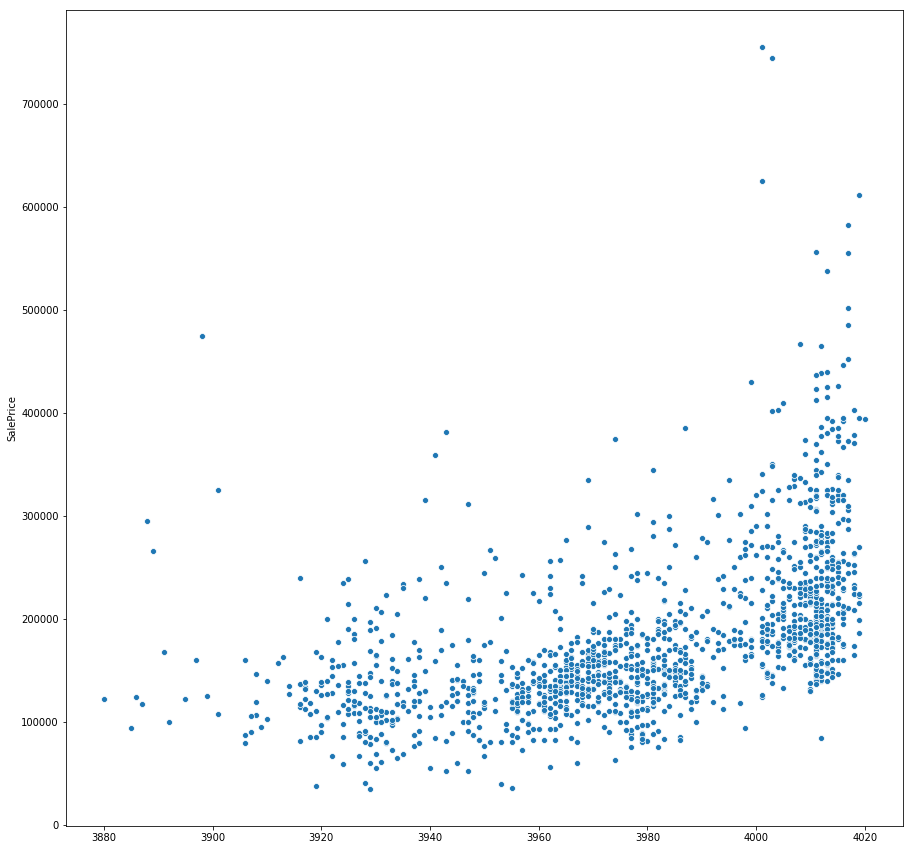

In [50]:
a,b = plt.subplots(1,1,figsize = (15,15))
sns.scatterplot(sum_year,train["SalePrice"])

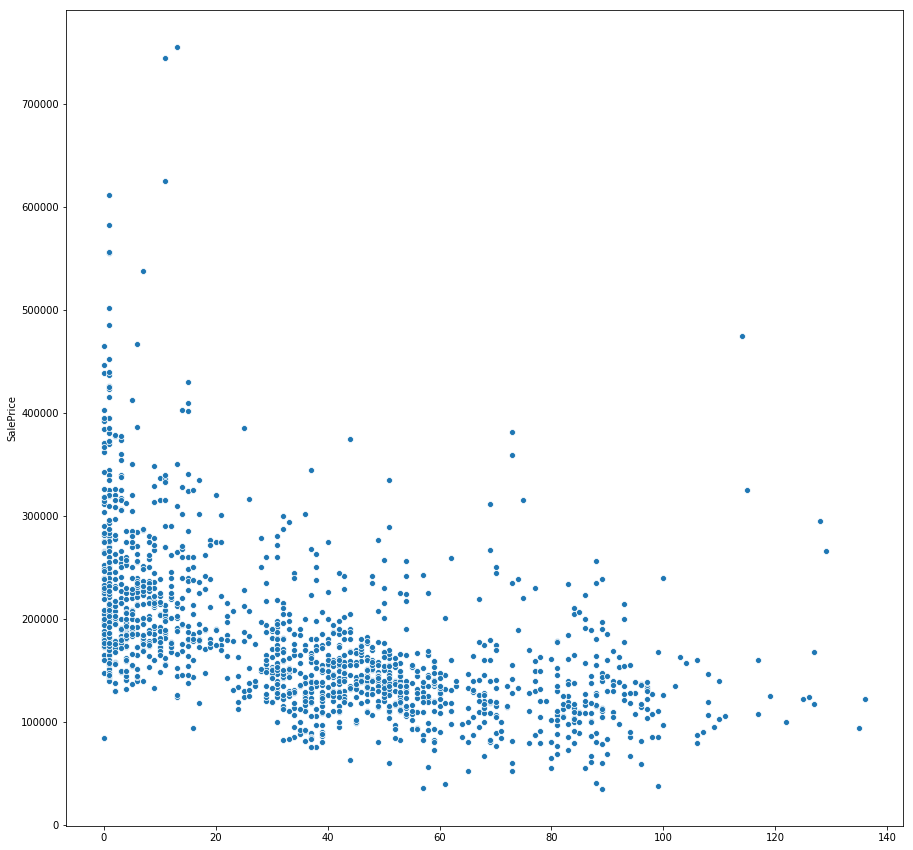

In [51]:
a,b = plt.subplots(1,1,figsize = (15,15))
sns.scatterplot(minus_year,train["SalePrice"])

In [52]:
# 시설물이 있다 없다
# 교호작용 

In [53]:
alldata["sum_year"] = alldata["YearBuilt"] + alldata["YrSold"]

In [54]:
alldata["minus_year"] = alldata["YrSold"] - alldata["YearBuilt"]

In [55]:
#alldata.drop(["PoolQC","Fence","MiscFeature","FireplaceQu","Alley"],axis=1,inplace=True)

In [56]:
from sklearn.preprocessing import LabelEncoder
cat_cals = alldata.columns[alldata.dtypes=="object"]
for i in cat_cals:
    le = LabelEncoder()
    le.fit(list(alldata[i]))
    alldata[i] = le.transform(list(alldata[i]))

In [57]:
alldata.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,sum_year,minus_year
0,856,854,0,1,3,0,4,3,706.0,0.0,2,6,1.0,0.0,2,150.0,1,2,2,4,0,4,2,12,13,4,3,0,2,2,6,548.0,2.0,5,2,5,1,2003.0,1710,1,1,0,5,1,2,3,0,8450,4,65.0,3,0,60,3,196.0,1,1,0,2,5,61,5,7,2,0,3,1,1,4,208500.0,8,0,1,8,856.0,0,2003,2003.0,2008,4011,5
1,1262,0,0,1,3,0,4,1,978.0,0.0,0,6,0.0,1.0,2,284.0,1,1,2,4,0,4,3,8,8,4,5,1,1,2,6,460.0,2.0,5,2,5,1,1976.0,1262,0,1,0,2,1,3,3,0,9600,2,80.0,3,0,20,3,0.0,2,1,0,5,24,0,8,6,2,0,3,1,1,4,181500.0,8,0,1,6,1262.0,298,1976,1976.0,2007,3983,31
2,920,866,0,1,3,0,4,2,486.0,0.0,2,6,1.0,0.0,2,434.0,1,2,2,4,0,4,2,12,13,4,5,1,2,2,6,608.0,2.0,5,2,5,1,2001.0,1786,1,1,0,5,1,2,3,0,11250,4,68.0,0,0,60,3,162.0,1,1,0,9,5,42,5,7,2,0,3,1,1,4,223500.0,8,0,1,6,920.0,0,2001,2002.0,2008,4009,7
3,961,756,0,1,3,0,1,3,216.0,0.0,0,6,1.0,0.0,4,540.0,1,2,2,4,272,4,3,13,15,4,2,1,0,1,6,642.0,3.0,5,3,5,5,1998.0,1717,0,1,2,5,1,2,3,0,9550,0,60.0,0,0,70,3,0.0,2,1,0,2,6,35,5,7,2,0,3,1,1,0,140000.0,8,0,1,7,756.0,0,1915,1970.0,2006,3921,91
4,1145,1053,0,1,4,0,4,0,655.0,0.0,2,6,1.0,0.0,2,490.0,1,2,2,4,0,4,2,12,13,4,5,1,2,2,6,836.0,3.0,5,2,5,1,2000.0,2198,1,1,0,5,1,2,3,0,14260,2,84.0,0,0,60,3,350.0,1,1,0,12,15,84,5,8,2,0,3,1,1,4,250000.0,8,0,1,9,1145.0,192,2000,2000.0,2008,4008,8


In [58]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null int64
BsmtCond         2919 non-null int64
BsmtExposure     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null int64
BsmtFinType2     2919 non-null int64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null int64
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null int64
Condition1       2919 non-null int64
Condition2       2919 non-null int64
Electrical       2919 non-null int64
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null int64
ExterQual        2919 non-null int64
Exterior1st      2919 non-null i

In [59]:
train = alldata[:len(train)]
test = alldata[len(train):]

In [60]:
train.shape

(1460, 81)

In [61]:
test.drop(["SalePrice"],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
test.shape

(1459, 80)

In [63]:
y = train["SalePrice"]
x_train = train.drop(["SalePrice"],axis=1)

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
#rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth = 5)

In [66]:
#rf_x = x_train.fillna(0)

In [67]:
#rf.fit(rf_x,y)

In [68]:
#rf_test = test.fillna(0)

In [69]:
#rf_pred = rf.predict(rf_test)

In [70]:
#rf_pred

In [71]:
#sub = pd.read_csv("../input/home-data-for-ml-course/sample_submission.csv")

In [72]:
#sub.head()

In [73]:
#sub["SalePrice"] = rf_pred

In [74]:
#sub.to_csv("rf_result.csv",index=False)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
sub_train, sub_val = train_test_split(train, test_size=0.25, random_state = 42)

In [77]:
sub_train_idx = sub_train.index
sub_val_idx = sub_val.index

In [78]:
from lightgbm import LGBMRegressor

In [79]:
from bayes_opt import BayesianOptimization

In [80]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [81]:
bound_params = {
        "n_estimators" : (100,500),
        "num_leaves" : (4,8),
        "subsample" : (0.2,0.8),
        "colsample_bytree" : (0.2,0.8),
        "reg_alpha" : (0,1), #1보다 더 커져도됨
        "reg_lambda" : (0,1), # 1보다 더 커져도됨 
        "min_data_in_leaf" : (10,100), # 샌프란시스코대회에서 중요함 이게 커지면 좋은 경우가 많음, 
                                    #다중분류에서 종류가 너무 많으면 키워주면 좋은 경우가 많다
                                    #기본값은 20, 20주변으로 해준다 
                                    #막 100 200 넘어갈수도있음
        "max_depth" : (-1,50), # 혹시나 -1을 선택하면 최대 depth 
    }

In [82]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
# 등등 더 들어갈 수 있다
# num_leaves, subsample, colsample_bytree, 필수
# reg_alpha,reg_lambda,min_child_samples,max_depth 대회에 따라 option
# 다른 하이퍼파라미터에 비해서 영향력이 워낙 크기 때문에 다른 것들의 영향력이 작아져서 튜닝이 안됩니다(n_estimator,learning_rate를 안넣는 이유)
def bayesian_lgb(num_leaves, subsample, colsample_bytree,reg_alpha,reg_lambda,min_data_in_leaf,max_depth,n_estimators) :
    #정수여야 하는 파라미터들은 정해줘야합니다
    n_estimators = int(n_estimators)
    num_leaves = int(num_leaves)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)
    assert type(n_estimators) == int
    assert type(num_leaves) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int
    
    params = {
        "n_estimators" : n_estimators,
        "num_leaves" : num_leaves,
        "subsample" : subsample,
        "colsample_bytree" : colsample_bytree,
        "reg_alpha" : reg_alpha,
        "reg_lambda" : reg_lambda,
        "min_data_in_leaf" : min_data_in_leaf,
        "max_depth" : max_depth,
    }
    # parameter넣을떈 **넣는게 정신건강에 이롭다
    lgb = LGBMRegressor(**params)
    lgb.fit(x_train.iloc[sub_train_idx],y.iloc[sub_train_idx],eval_set=(x_train.iloc[sub_val_idx],y.iloc[sub_val_idx]),verbose=0)
    #그 shift tap5번 하면 함수 파라미터 출력
    #받아오는 방법이 있을거같긴해요
    score = -lgb.best_score_["valid_0"]["l2"]
    # 전역변수 선언안해줘도 앞에서 가져온 변수들 쓸 수 있음
    #scaler를 쓰면 dataframe-->array로 바뀌게 된다
    #label_encoder를 쓰면 array로 바뀌게 된다
    return score

In [83]:
#bo = BayesianOptimization(f= bayesian_lgb,pbounds = bound_params,random_state=42)
#bo.maximize(40,80)

In [84]:
#   target   | colsam... | max_depth | min_da... | num_le... | reg_alpha | reg_la... | subsample |
#   | -6.539e+0 |  0.6633   |  9.134    |  10.5     |  7.262    |  0.7069   |  0.729    |  0.6628 
# target   | colsam... | max_depth | min_da... | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
# | -6.297e+0 |  0.3586   |  36.89    |  12.35    |  488.0    |  6.032    |  0.7171   |  0.204    |  0.3825   |

In [85]:
lgb = LGBMRegressor(colsample_bytree = 0.3586,min_data_in_leaf=12,n_estimators=488,num_leaves=6,reg_alpha=0.7171,reg_lambda=0.204,subsample=0.3825)
# 데이터에 비해 피처가 너무 많아 reg_alpha,reg_lambda 를 줘서 몇몇 피처를 학습 안하도록 해준다

In [86]:
bound_params = {
        "learning_rate" : (0.01,0.1),
    }

In [87]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
# 등등 더 들어갈 수 있다
# num_leaves, subsample, colsample_bytree, 필수
# reg_alpha,reg_lambda,min_child_samples,max_depth 대회에 따라 option
# 다른 하이퍼파라미터에 비해서 영향력이 워낙 크기 때문에 다른 것들의 영향력이 작아져서 튜닝이 안됩니다(n_estimator,learning_rate를 안넣는 이유)
def bayesian_lgb(learning_rate) :
    #정수여야 하는 파라미터들은 정해줘야합니다
    n_estimators = 488*(0.1/learning_rate)
    n_estimators = int(n_estimators)
    assert type(n_estimators) == int
#colsample_bytree = 0.3586,min_data_in_leaf=12,n_estimators=488,num_leaves=6,reg_alpha=0.7171,reg_lambda=0.204,subsample=0.3825    
    params = {
        "n_estimators" : n_estimators,
        "learning_rate" : learning_rate
    }
    # parameter넣을떈 **넣는게 정신건강에 이롭다
    lgb = LGBMRegressor(colsample_bytree = 0.3586,min_data_in_leaf=12,n_estimators=n_estimators,num_leaves=6,reg_alpha=0.7171,reg_lambda=0.204,subsample=0.3825,learning_rate=learning_rate)
    lgb.fit(x_train.iloc[sub_train_idx],y.iloc[sub_train_idx],eval_set=(x_train.iloc[sub_val_idx],y.iloc[sub_val_idx]),verbose=0)
    #그 shift tap5번 하면 함수 파라미터 출력
    #받아오는 방법이 있을거같긴해요
    score = -lgb.best_score_["valid_0"]["l2"]
    # 전역변수 선언안해줘도 앞에서 가져온 변수들 쓸 수 있음
    #scaler를 쓰면 dataframe-->array로 바뀌게 된다
    #label_encoder를 쓰면 array로 바뀌게 된다
    return score

In [88]:
#bo = BayesianOptimization(f= bayesian_lgb,pbounds = bound_params,random_state=42)
#bo.maximize(10,20)

In [89]:
#16       | -6.154e+0 |  0.02651 

In [90]:
488*(0.1/0.02651)

1840.8147868728784

In [91]:
lgb = LGBMRegressor(colsample_bytree = 0.3586,min_data_in_leaf=12,n_estimators=1841,num_leaves=6,reg_alpha=0.7171,reg_lambda=0.204,subsample=0.3825,learning_rate=0.02651)

In [92]:
lgb.fit(x_train,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.3586,
              importance_type='split', learning_rate=0.02651, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=12,
              min_split_gain=0.0, n_estimators=1841, n_jobs=-1, num_leaves=6,
              objective=None, random_state=None, reg_alpha=0.7171,
              reg_lambda=0.204, silent=True, subsample=0.3825,
              subsample_for_bin=200000, subsample_freq=0)

In [93]:
importance = pd.DataFrame(lgb.feature_importances_)

In [94]:
train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [95]:
importance["columns"] = x_train.columns

In [96]:
importance.sort_values(0,ascending=False)

,0,columns
47,555,LotArea
38,548,GrLivArea
73,399,TotalBsmtSF
31,385,GarageArea
49,376,LotFrontage
0,355,1stFlrSF
62,354,OverallQual
8,352,BsmtFinSF1
60,335,OpenPorchSF
15,326,BsmtUnfSF


In [97]:
lgb_pred = lgb.predict(test)

In [98]:
"""sub = pd.read_csv("../input/home-data-for-ml-course/sample_submission.csv")
sub["SalePrice"] = lgb_pred
sub.to_csv("rf_result.csv",index=False)"""

'sub = pd.read_csv("../input/home-data-for-ml-course/sample_submission.csv")\nsub["SalePrice"] = lgb_pred\nsub.to_csv("rf_result.csv",index=False)'

In [99]:
from xgboost import XGBRegressor

In [100]:
xgb = XGBRegressor()

In [101]:
#xgb.fit(x_train.iloc[sub_train_idx],y.iloc[sub_train_idx],eval_set=[(x_train.iloc[sub_val_idx],y.iloc[sub_val_idx])],verbose=0)

In [102]:
bound_params = {
        "n_estimators" : (100,500),
        "subsample" : (0.2,0.8),
        "colsample_bytree" : (0.2,0.8),
        "reg_alpha" : (0,1), #1보다 더 커져도됨
        "reg_lambda" : (0,1), # 1보다 더 커져도됨 
        "min_data_in_leaf" : (10,100), # 샌프란시스코대회에서 중요함 이게 커지면 좋은 경우가 많음, 
                                    #다중분류에서 종류가 너무 많으면 키워주면 좋은 경우가 많다
                                    #기본값은 20, 20주변으로 해준다 
                                    #막 100 200 넘어갈수도있음
        "max_depth" : (2,4), # 혹시나 -1을 선택하면 최대 depth 
        "gamma" : (0,1) #통상적으로 0~1
    }

In [103]:
from xgboost import XGBRegressor
# 등등 더 들어갈 수 있다
# num_leaves, subsample, colsample_bytree, 필수
# reg_alpha,reg_lambda,min_child_samples,max_depth 대회에 따라 option
# 다른 하이퍼파라미터에 비해서 영향력이 워낙 크기 때문에 다른 것들의 영향력이 작아져서 튜닝이 안됩니다(n_estimator,learning_rate를 안넣는 이유)
def bayesian_xgb( n_estimators,subsample, colsample_bytree,reg_alpha,reg_lambda,min_data_in_leaf,max_depth,gamma) :
    #정수여야 하는 파라미터들은 정해줘야합니다
    n_estimators = int(n_estimators)
    min_data_in_leaf = int(min_data_in_leaf)
    max_depth = int(max_depth)
    assert type(n_estimators) == int
    assert type(min_data_in_leaf) == int
    assert type(max_depth) == int
    
    params = {
        "n_estimators" : n_estimators,
        "subsample" : subsample,
        "colsample_bytree" : colsample_bytree,
        "reg_alpha" : reg_alpha,
        "reg_lambda" : reg_lambda,
        "min_data_in_leaf" : min_data_in_leaf,
        "max_depth" : max_depth,
        "metric" : "MAE",
        "gamma" : gamma,
        "objective" :"reg:squarederror",
        "nthread" : -1,
    }
    # parameter넣을떈 **넣는게 정신건강에 이롭다
    xgb = XGBRegressor(**params)
    xgb.fit(x_train.iloc[sub_train_idx],y.iloc[sub_train_idx],eval_set=[(x_train.iloc[sub_val_idx],y.iloc[sub_val_idx])],verbose=0)
    #그 shift tap5번 하면 함수 파라미터 출력
    #받아오는 방법이 있을거같긴해요
    score = -xgb.evals_result_['validation_0']['rmse'][-1]
    # 전역변수 선언안해줘도 앞에서 가져온 변수들 쓸 수 있음
    #scaler를 쓰면 dataframe-->array로 바뀌게 된다
    #label_encoder를 쓰면 array로 바뀌게 된다
    return score

In [104]:
#bo = BayesianOptimization(bayesian_xgb,bound_params,random_state=42)
#bo.maximize(40,80)

In [105]:
#  target   | colsam... |   gamma   | max_depth | min_da... | n_esti... | reg_alpha | reg_la... | subsample |#
# -2.355e+0 |  0.203    |  0.1608   |  3.097    |  72.27    |  360.8    |  0.2243   |  0.7122   |  0.3423   |

In [106]:
bound_params = {
        "learning_rate" : (0.01,0.1),
    }

In [107]:
from xgboost import XGBRegressor
# 등등 더 들어갈 수 있다
# num_leaves, subsample, colsample_bytree, 필수
# reg_alpha,reg_lambda,min_child_samples,max_depth 대회에 따라 option
# 다른 하이퍼파라미터에 비해서 영향력이 워낙 크기 때문에 다른 것들의 영향력이 작아져서 튜닝이 안됩니다(n_estimator,learning_rate를 안넣는 이유)
def bayesian_xgb( learning_rate) :
    n_estimators = 360*(0.1/learning_rate)
    n_estimators = int(n_estimators)
    assert type(n_estimators) == int
    #정수여야 하는 파라미터들은 정해줘야합니다
    params = {
        "n_estimators" : n_estimators,
        "learning_rate" : learning_rate
    }
    
    # parameter넣을떈 **넣는게 정신건강에 이롭다
    xgb = XGBRegressor(colsample_bytree = 0.203,gamma = 0.1608,max_depth = 3, min_data_in_leaf = 72,n_estimators = n_estimators,reg_lambda = 0.7122, reg_alpha = 0.2243, subsample=0.3423,learning_rate=learning_rate)
    xgb.fit(x_train.iloc[sub_train_idx],y.iloc[sub_train_idx],eval_set=[(x_train.iloc[sub_val_idx],y.iloc[sub_val_idx])],verbose=0)
    #그 shift tap5번 하면 함수 파라미터 출력
    #받아오는 방법이 있을거같긴해요
    score = -xgb.evals_result_['validation_0']['rmse'][-1]
    # 전역변수 선언안해줘도 앞에서 가져온 변수들 쓸 수 있음
    #scaler를 쓰면 dataframe-->array로 바뀌게 된다
    #label_encoder를 쓰면 array로 바뀌게 된다
    return score

In [108]:
#bo = BayesianOptimization(bayesian_xgb,bound_params,random_state=42)
#bo.maximize(60,20)

In [109]:
#|  65       | -2.305e+0 |  0.08067  |

In [110]:
 360*(0.1/0.08067)

446.2625511342506

In [111]:
xgb = XGBRegressor(colsample_bytree = 0.203,gamma = 0.1608,max_depth = 3, min_data_in_leaf = 72,n_estimators = 446,reg_lambda = 0.7122, reg_alpha = 0.2243, subsample=0.3423,learning_rate = 0.08067)

In [112]:
xgb.fit(x_train,y)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:39:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.203, gamma=0.1608,
             importance_type='gain', learning_rate=0.08067, max_delta_step=0,
             max_depth=3, min_child_weight=1, min_data_in_leaf=72, missing=None,
             n_estimators=446, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.2243, reg_lambda=0.7122,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.3423,
             verbosity=1)

In [113]:
xgb_pred = xgb.predict(test)

In [114]:
sub = pd.read_csv("../input/home-data-for-ml-course/sample_submission.csv")
sub["SalePrice"] = 0.3*xgb_pred + 0.7*lgb_pred
sub.to_csv("lgbxgb_result.csv",index=False)